<a href="https://colab.research.google.com/github/Prog1xx1/studia/blob/main/DryBean2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow==2.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 454.3 MB 15 kB/s 
     |████████████████████████████████| 1.2 MB 51.4 MB/s 
     |████████████████████████████████| 462 kB 57.1 MB/s 
     |████████████████████████████████| 14.8 MB 27.9 MB/s 
     |████████████████████████████████| 132 kB 51.9 MB/s 
     |████████████████████████████████| 4.0 MB 18.6 MB/s 
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=68724 sha256=4fb3cc28b8d170efef26cbe3883c39235e4e4c95de08bd661d9bc1833609bbe8
  Stored in directory: /root/.cache/pip/wheels/62/76/4c/aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built wrapt
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.1.1
    Uninstalling typing-extensions-4.1.1:
      Successfully uninstalled typing-extensions-4.1.1
  Attempting uninstall: numpy
    Found existing installation: n

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import urllib.request as urllib
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Dropout
from tensorflow.keras import optimizers
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, auc, precision_score, f1_score, plot_confusion_matrix, mean_squared_error
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns
tf.__version__

'2.5.0'

In [ ]:
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(17, 6)):
    y_score = clf.predict_proba(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Krzywe ROC')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve dla klasy %s' % ( labels[i]))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    return plt

def plot_conf_matrix(clf,X, y):
    fig_conf, ax_conf = plt.subplots(figsize=(15, 15))
    disp = plot_confusion_matrix(clf, X, y,
                             
                             cmap=plt.cm.Blues,
                             ax = ax_conf,
                             normalize='true')

    return plt

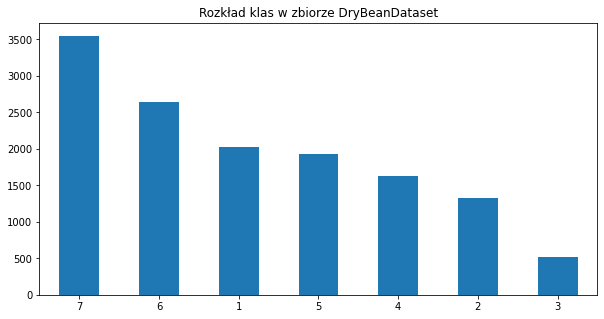

In [ ]:
zbior2 = pd.read_excel("Dry_Bean_Dataset.xlsx")
zbior2
zbior2.loc[zbior2["Class"] == "SEKER" , "Class"] = 1
zbior2.loc[zbior2["Class"] == "BARBUNYA" , "Class"] = 2
zbior2.loc[zbior2["Class"] == "BOMBAY" , "Class"] = 3
zbior2.loc[zbior2["Class"] == "CALI" , "Class"] = 4
zbior2.loc[zbior2["Class"] == "HOROZ" , "Class"] = 5
zbior2.loc[zbior2["Class"] == "SIRA" , "Class"] = 6
zbior2.loc[zbior2["Class"] == "DERMASON" , "Class"] = 7

zbior2.Class.value_counts(dropna=False).plot(
    kind='bar',
    rot=0,
    title='Rozkład klas w zbiorze DryBeanDataset',
    figsize=(10, 5)
)

In [ ]:
dane_do_treningu2, dane_do_testowania2 = train_test_split(zbior2, test_size=0.2)
le_zbior2 = LabelEncoder()

trening_label2 = le_zbior2.fit_transform(dane_do_treningu2['Class'].values)
test_label2 = le_zbior2.transform(dane_do_testowania2['Class'].values)
#dane_do_treningu2 = dane_do_treningu2.drop(['Class'], axis=1).reset_index().drop('index', axis=1)
#dane_do_testowania2 = dane_do_testowania2.drop(['Class'], axis=1).reset_index().drop('index', axis=1)
labels = le_zbior2.classes_

etykiety_trenowania = dane_do_treningu2.pop("Class")
etykiety_testu = dane_do_testowania2.pop("Class")
trenowanie1 = pd.get_dummies(etykiety_trenowania, prefix='Class')
test1 = pd.get_dummies(etykiety_testu, prefix="Class")

statystyka= dane_do_treningu2.describe()
statystyka = statystyka.transpose()
statystyka
def normalizacja(x):
  return (x - statystyka['mean'])/statystyka['std']
znormalizowany_trening = normalizacja(dane_do_treningu2)
znormalizowany_test = normalizacja(dane_do_testowania2)
trenowanie2 = pd.get_dummies(etykiety_trenowania, prefix='Class')
test2 = pd.get_dummies(etykiety_testu, prefix="Class")

In [ ]:
statystyka2= zbior2.describe()
#statystyka2 = statystyka2.transpose()
print(statystyka2)

                Area     Perimeter  MajorAxisLength  MinorAxisLength  \
count   13611.000000  13611.000000     13611.000000     13611.000000   
mean    53048.284549    855.283459       320.141867       202.270714   
std     29324.095717    214.289696        85.694186        44.970091   
min     20420.000000    524.736000       183.601165       122.512653   
25%     36328.000000    703.523500       253.303633       175.848170   
50%     44652.000000    794.941000       296.883367       192.431733   
75%     61332.000000    977.213000       376.495012       217.031741   
max    254616.000000   1985.370000       738.860153       460.198497   

       AspectRation  Eccentricity     ConvexArea  EquivDiameter        Extent  \
count  13611.000000  13611.000000   13611.000000   13611.000000  13611.000000   
mean       1.583242      0.750895   53768.200206     253.064220      0.749733   
std        0.246678      0.092002   29774.915817      59.177120      0.049086   
min        1.024868      0.

In [ ]:
def budowa():
    model = Sequential()
    model.add(Dense(160, activation="relu", input_shape = (znormalizowany_trening.shape[1],)))    
    model.add(Dense(320, activation="tanh"))
    model.add(Dense(160,activation="tanh"))       
    model.add(Dense(7, activation='softmax'))                          
    learning_rate = 0.0001
    optimizer = optimizers.SGD(learning_rate)
    model.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy']) 
    return model

EPOKA=25
batch_size=24
model = budowa()
model.summary()

history = model.fit(
        znormalizowany_trening, 
        trenowanie1,
        batch_size = batch_size,
        epochs=EPOKA, 
        verbose=1,
        shuffle=True,
        #steps_per_epoch = int(znormalizowany_trening.shape[0] / batch_size) ,
        #validation_data = (znormalizowana_walidacja, walidacja1),   
    )

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 160)               2720      
_________________________________________________________________
dense_5 (Dense)              (None, 320)               51520     
_________________________________________________________________
dense_6 (Dense)              (None, 160)               51360     
_________________________________________________________________
dense_7 (Dense)              (None, 7)                 1127      
Total params: 106,727
Trainable params: 106,727
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
454/454 [==============================] - 1s 2ms/step - loss: 1.7943 - accuracy: 0.4551
Epoch 2/25
454/454 [==============================] - 1s 2ms/step - loss: 1.6274 - accuracy: 0.5861
Epoch 3/25
454/454 [==========================

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       398
           1       0.66      0.95      0.78       182
           2       0.93      1.00      0.96        96
           3       0.91      0.80      0.85       403
           4       0.95      0.78      0.85       502
           5       0.41      0.91      0.56       240
           6       0.97      0.74      0.84       902

    accuracy                           0.82      2723
   macro avg       0.83      0.87      0.83      2723
weighted avg       0.89      0.82      0.83      2723



/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

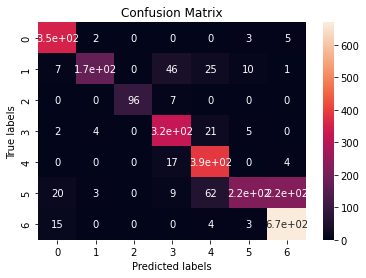

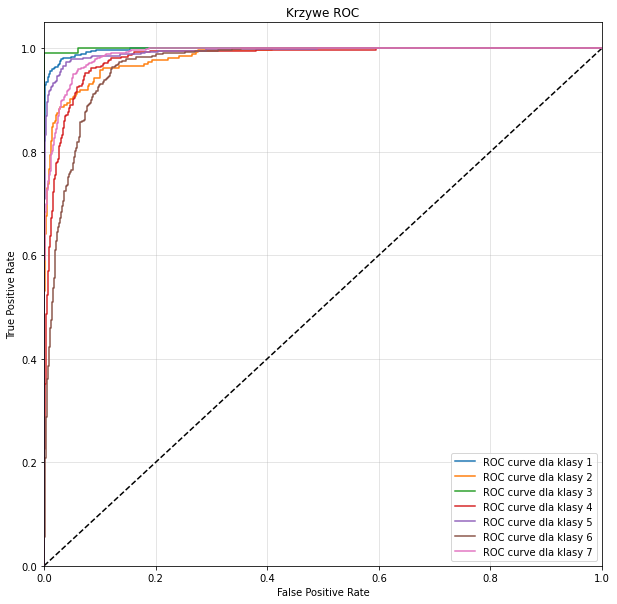

In [ ]:
predict_results = model.predict(znormalizowany_test)

predict_results= predict_results.argmax(axis = 1)
accuracy_score(predict_results, test_label2)
print(classification_report(predict_results, test_label2))

ax= plt.subplot()
cm = confusion_matrix(test_label2, predict_results)
sns.heatmap(cm, annot=True, ax = ax); 
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
plot_multiclass_roc(model, znormalizowany_test, test_label2, len(zbior2.Class.unique()), figsize=(10, 10))




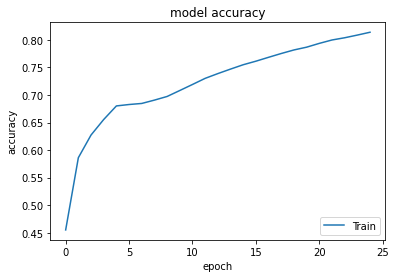

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train'], loc='lower right')
plt.show()

##2 SIEĆ



In [ ]:
###############################################################
#### DRUGA SIEC ####
def budowa2():
    model = Sequential()
    model.add(Dense(160, activation="sigmoid", input_shape = (znormalizowany_trening.shape[1],)))   
    model.add(Dense(320, activation="sigmoid"))     
    model.add(Dense(7, activation='softmax'))                          
    learning_rate = 0.01
    optimizer = optimizers.SGD(learning_rate)
    model.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy']) 
    return model
EPOKA = 25
batch_size = 24
model2 = budowa2()
model2.summary()

history2 = model2.fit(
        znormalizowany_trening, 
        trenowanie1,
        batch_size = batch_size,
        epochs=EPOKA, 
        verbose=1,
        shuffle=True,
        steps_per_epoch = int(znormalizowany_trening.shape[0] / batch_size)  
    )

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 160)               2720      
_________________________________________________________________
dense_9 (Dense)              (None, 320)               51520     
_________________________________________________________________
dense_10 (Dense)             (None, 7)                 2247      
Total params: 56,487
Trainable params: 56,487
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
453/453 [==============================] - 2s 3ms/step - loss: 1.7640 - accuracy: 0.2709
Epoch 2/25
453/453 [==============================] - 1s 2ms/step - loss: 1.5769 - accuracy: 0.3523
Epoch 3/25
453/453 [==============================] - 1s 2ms/step - loss: 1.3298 - accuracy: 0.5045
Epoch 4/25
453/453 [==============================] - 1s 2ms/step - loss: 1.0910

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       378
           1       0.83      0.92      0.87       237
           2       1.00      0.99      1.00       104
           3       0.93      0.89      0.91       370
           4       0.96      0.94      0.95       420
           5       0.87      0.84      0.86       557
           6       0.89      0.93      0.91       657

    accuracy                           0.91      2723
   macro avg       0.92      0.92      0.92      2723
weighted avg       0.91      0.91      0.91      2723



/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

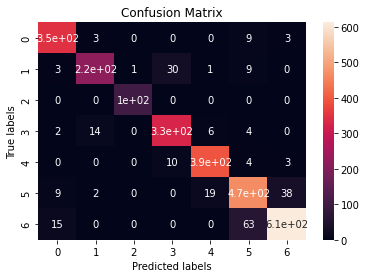

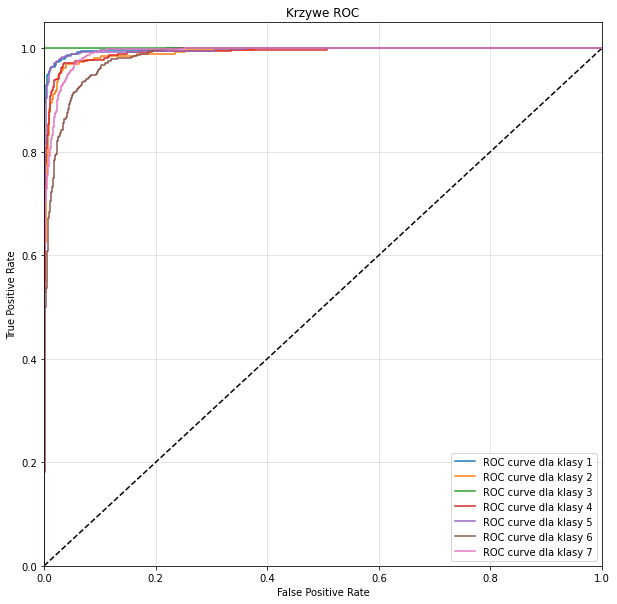

In [ ]:
predict_results = model2.predict(znormalizowany_test)

predict_results= predict_results.argmax(axis = 1)
accuracy_score(predict_results, test_label2)
print(classification_report(predict_results, test_label2))

ax= plt.subplot()
cm = confusion_matrix(test_label2, predict_results)
sns.heatmap(cm, annot=True, ax = ax); 
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
plot_multiclass_roc(model2, znormalizowany_test, test_label2, len(zbior2.Class.unique()), figsize=(10, 10))

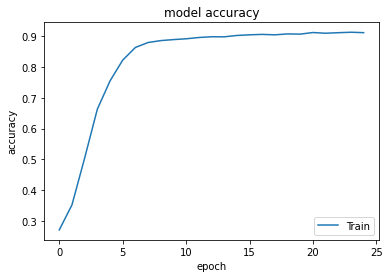

In [ ]:
plt.plot(history2.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train'], loc='lower right')
plt.show()

## 3 sieć

In [ ]:
##### 3 siec ####
def budowa3():
    model = Sequential()
    model.add(Dense(160, activation="elu", input_shape = (znormalizowany_trening.shape[1],)))    
    model.add(Dense(100, activation="sigmoid"))     
    model.add(Dense(70, activation='elu'))
    model.add(Dense(200, activation="sigmoid")) 
    model.add(Dense(120, activation="elu")) 
    model.add(Dense(7, activation="softmax")) 
                              
    learning_rate = 0.1
    optimizer = optimizers.SGD(learning_rate)
    model.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy']) 
    return model
EPOKA = 25
batch_size = 24
model3 = budowa3()
model3.summary()

history3 = model3.fit(
        znormalizowany_trening, 
        trenowanie1,
        batch_size = batch_size,
        epochs=EPOKA, 
        verbose=1,
        shuffle=True,
        steps_per_epoch = int(znormalizowany_trening.shape[0] / batch_size)   
    )

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 160)               2720      
_________________________________________________________________
dense_12 (Dense)             (None, 100)               16100     
_________________________________________________________________
dense_13 (Dense)             (None, 70)                7070      
_________________________________________________________________
dense_14 (Dense)             (None, 200)               14200     
_________________________________________________________________
dense_15 (Dense)             (None, 120)               24120     
_________________________________________________________________
dense_16 (Dense)             (None, 7)                 847       
Total params: 65,057
Trainable params: 65,057
Non-trainable params: 0
__________________________________________________

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       374
           1       0.89      0.94      0.91       249
           2       0.99      1.00      1.00       102
           3       0.93      0.92      0.93       359
           4       0.95      0.95      0.95       412
           5       0.85      0.89      0.87       513
           6       0.93      0.90      0.92       714

    accuracy                           0.92      2723
   macro avg       0.93      0.93      0.93      2723
weighted avg       0.92      0.92      0.92      2723



/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

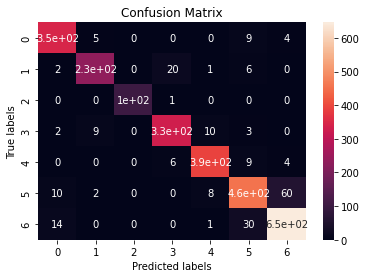

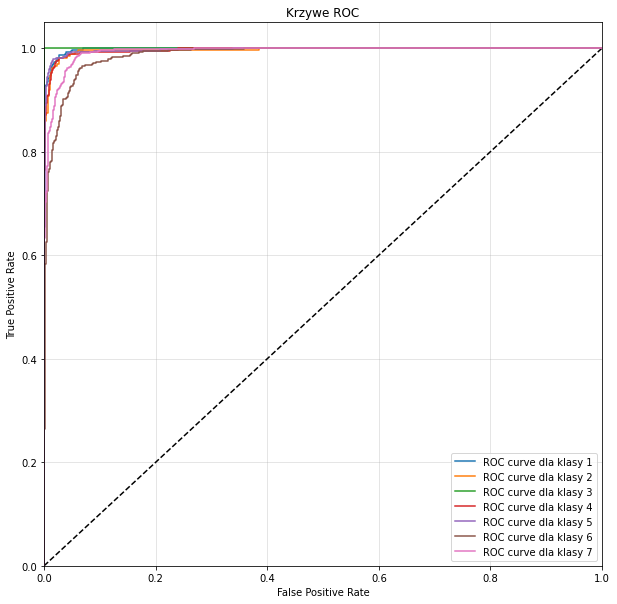

In [ ]:
predict_results = model3.predict(znormalizowany_test)

predict_results= predict_results.argmax(axis = 1)
accuracy_score(predict_results, test_label2)
print(classification_report(predict_results, test_label2))

ax= plt.subplot()
cm = confusion_matrix(test_label2, predict_results)
sns.heatmap(cm, annot=True, ax = ax); 
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
plot_multiclass_roc(model3, znormalizowany_test, test_label2, len(zbior2.Class.unique()), figsize=(10, 10))

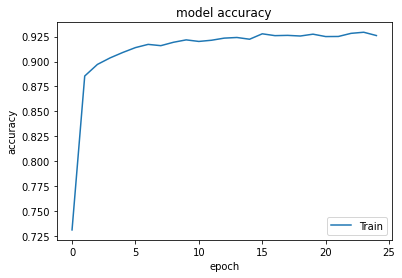

In [ ]:
plt.plot(history3.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train'], loc='lower right')
plt.show()

## 4 sieć

In [ ]:
#### Czwarta SIEC ####
def budowa4():
    model = Sequential()
    model.add(Dense(120, activation="sigmoid", input_shape = (znormalizowany_trening.shape[1],)))   
    model.add(Dense(40, activation="sigmoid"))     
    model.add(Dense(7, activation='softmax'))                          
    learning_rate = 0.01
    optimizer = optimizers.SGD(learning_rate)
    model.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy']) 
    return model
EPOKA = 25
batch_size = 24
model4 = budowa4()
model4.summary()

history4 = model4.fit(
        znormalizowany_trening, 
        trenowanie1,
        batch_size = batch_size,
        epochs=EPOKA, 
        verbose=1,
        shuffle=True,
          
    )

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 120)               2040      
_________________________________________________________________
dense_18 (Dense)             (None, 40)                4840      
_________________________________________________________________
dense_19 (Dense)             (None, 7)                 287       
Total params: 7,167
Trainable params: 7,167
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
454/454 [==============================] - 2s 2ms/step - loss: 1.7885 - accuracy: 0.2539
Epoch 2/25
454/454 [==============================] - 1s 2ms/step - loss: 1.6142 - accuracy: 0.3385
Epoch 3/25
454/454 [==============================] - 2s 4ms/step - loss: 1.4327 - accuracy: 0.4159
Epoch 4/25
454/454 [==============================] - 1s 2ms/step - loss: 1.2673 -

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       379
           1       0.82      0.91      0.87       235
           2       0.99      0.99      0.99       103
           3       0.92      0.88      0.90       370
           4       0.96      0.93      0.94       425
           5       0.82      0.88      0.85       499
           6       0.93      0.90      0.91       712

    accuracy                           0.91      2723
   macro avg       0.91      0.92      0.91      2723
weighted avg       0.91      0.91      0.91      2723



/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

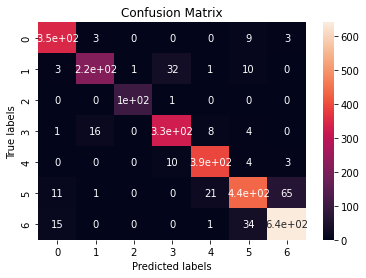

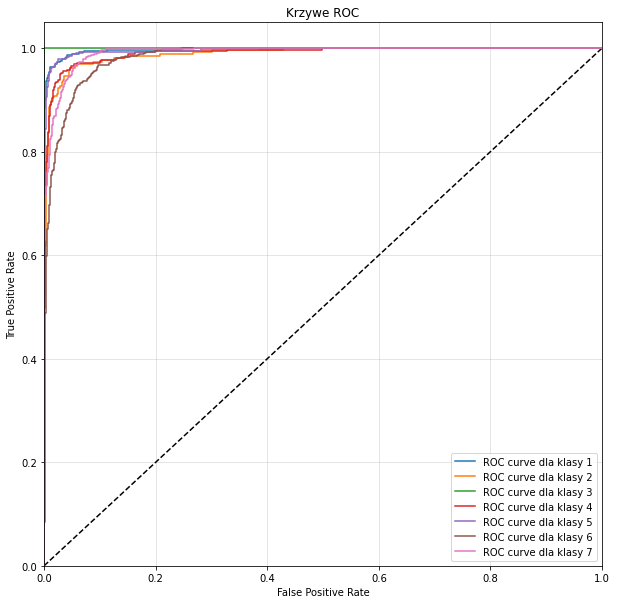

In [ ]:
predict_results = model4.predict(znormalizowany_test)

predict_results= predict_results.argmax(axis = 1)
accuracy_score(predict_results, test_label2)
print(classification_report(predict_results, test_label2))

ax= plt.subplot()
cm = confusion_matrix(test_label2, predict_results)
sns.heatmap(cm, annot=True, ax = ax); 
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
plot_multiclass_roc(model4, znormalizowany_test, test_label2, len(zbior2.Class.unique()), figsize=(10, 10))

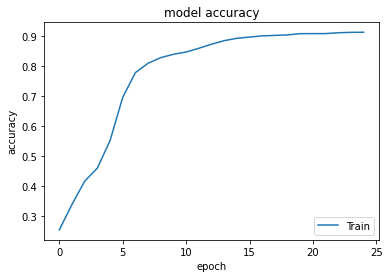

In [ ]:
plt.plot(history4.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train'], loc='lower right')
plt.show()

## 5 sieć

In [ ]:
#### Piata SIEC ####
def budowa5():
    model = Sequential()
    model.add(Dense(120, activation="relu", input_shape = (znormalizowany_trening.shape[1],))) 
    model.add(Dropout(0.5))  
    model.add(Dense(160, activation="relu"))     
    model.add(Dense(7, activation='softmax'))                          
    learning_rate = 0.01
    optimizer = optimizers.SGD(learning_rate)
    model.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy']) 
    return model
EPOKA = 25
batch_size = 24
model5 = budowa5()
model5.summary()
history5 = model5.fit(
        znormalizowany_trening, 
        trenowanie1,
        batch_size = batch_size,
        epochs=EPOKA, 
        verbose=1,
        shuffle=True,  
    )

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 120)               2040      
_________________________________________________________________
dropout (Dropout)            (None, 120)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 160)               19360     
_________________________________________________________________
dense_22 (Dense)             (None, 7)                 1127      
Total params: 22,527
Trainable params: 22,527
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
454/454 [==============================] - 2s 3ms/step - loss: 1.0579 - accuracy: 0.6484
Epoch 2/25
454/454 [==============================] - 1s 2ms/step - loss: 0.5287 - accuracy: 0.8430
Epoch 3/25
454/454 [============================

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       363
           1       0.91      0.93      0.92       258
           2       1.00      1.00      1.00       103
           3       0.94      0.94      0.94       357
           4       0.95      0.96      0.96       409
           5       0.89      0.86      0.88       556
           6       0.91      0.93      0.92       677

    accuracy                           0.93      2723
   macro avg       0.94      0.94      0.94      2723
weighted avg       0.93      0.93      0.93      2723



/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

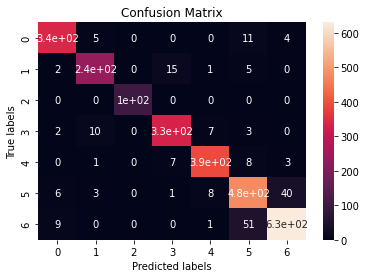

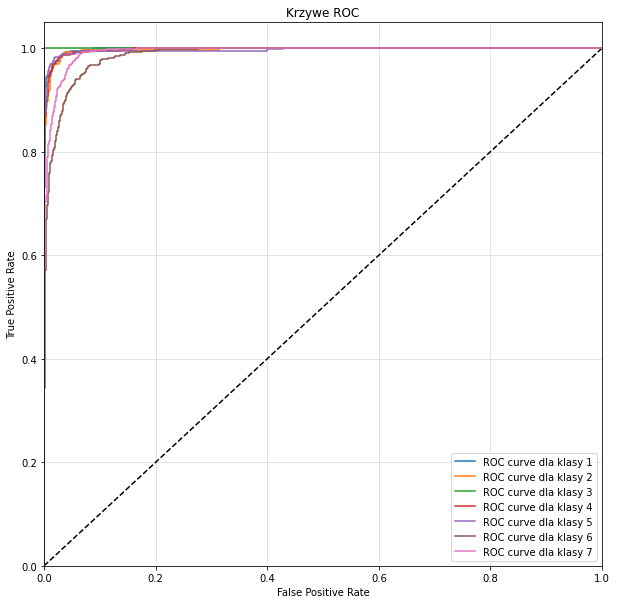

In [ ]:
predict_results = model5.predict(znormalizowany_test)

predict_results= predict_results.argmax(axis = 1)
accuracy_score(predict_results, test_label2)
print(classification_report(predict_results, test_label2))

ax= plt.subplot()
cm = confusion_matrix(test_label2, predict_results)
sns.heatmap(cm, annot=True, ax = ax); 
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
plot_multiclass_roc(model5, znormalizowany_test, test_label2, len(zbior2.Class.unique()), figsize=(10, 10))

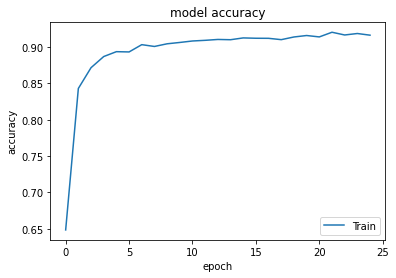

In [ ]:
plt.plot(history5.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train'], loc='lower right')
plt.show()

## 6 sieć

In [ ]:
#### szósta SIEC ####
def budowa6():
    model = Sequential()
    model.add(Dense(120, activation="elu", input_shape = (znormalizowany_trening.shape[1],))) 
    model.add(Dense(80, activation="elu"))     
    model.add(Dense(7, activation='softmax'))                          
    learning_rate = 0.01
    optimizer = optimizers.SGD(learning_rate)
    model.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy']) 
    return model
EPOKA = 25
batch_size = 24
model6 = budowa6()
model6.summary()

with tf.device('/CPU:0'): 

    history6 = model6.fit(
        znormalizowany_trening, 
        trenowanie1,
        batch_size = batch_size,
        epochs=EPOKA, 
        verbose=1,
        shuffle=True  
    )

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 120)               2040      
_________________________________________________________________
dense_24 (Dense)             (None, 80)                9680      
_________________________________________________________________
dense_25 (Dense)             (None, 7)                 567       
Total params: 12,287
Trainable params: 12,287
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
454/454 [==============================] - 2s 3ms/step - loss: 0.6571 - accuracy: 0.8080
Epoch 2/25
454/454 [==============================] - 1s 2ms/step - loss: 0.3122 - accuracy: 0.9111
Epoch 3/25
454/454 [==============================] - 1s 3ms/step - loss: 0.2556 - accuracy: 0.9193
Epoch 4/25
454/454 [==============================] - 1s 2ms/step - loss: 0.2349

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       366
           1       0.92      0.93      0.92       260
           2       1.00      1.00      1.00       103
           3       0.93      0.94      0.93       353
           4       0.95      0.95      0.95       412
           5       0.88      0.87      0.87       544
           6       0.91      0.92      0.92       685

    accuracy                           0.92      2723
   macro avg       0.93      0.94      0.94      2723
weighted avg       0.92      0.92      0.92      2723



/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

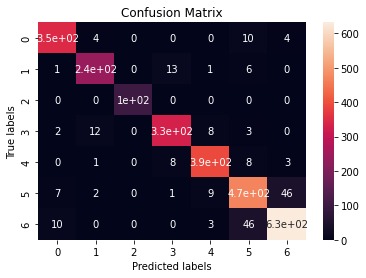

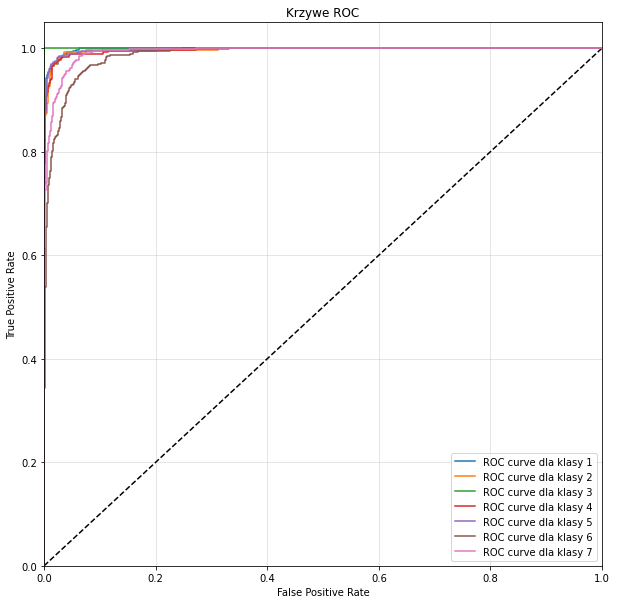

In [ ]:
predict_results = model6.predict(znormalizowany_test)

predict_results= predict_results.argmax(axis = 1)
accuracy_score(predict_results, test_label2)
print(classification_report(predict_results, test_label2))

ax= plt.subplot()
cm = confusion_matrix(test_label2, predict_results)
sns.heatmap(cm, annot=True, ax = ax); 
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
plot_multiclass_roc(model6, znormalizowany_test, test_label2, len(zbior2.Class.unique()), figsize=(10, 10))

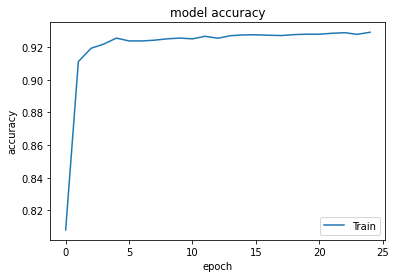

In [ ]:
plt.plot(history6.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train'], loc='lower right')
plt.show()

## 7 sieć

In [ ]:
#### siódma SIEC ####
def budowa7():
    model = Sequential()
    model.add(Dense(120, activation="elu", input_shape = (znormalizowany_trening.shape[1],))) 
    model.add(Dense(80, activation="elu"))
    model.add(Dense(200, activation="softplus"))      
    model.add(Dense(7, activation='softmax'))                          
    learning_rate = 0.01
    optimizer = optimizers.SGD(learning_rate)
    model.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy']) 
    return model
EPOKA = 25
batch_size = 24
model7 = budowa7()
model7.summary()

with tf.device('/CPU:0'): 

    history7 = model7.fit(
        znormalizowany_trening, 
        trenowanie1,
        batch_size = batch_size,
        epochs=EPOKA, 
        verbose=1,
        shuffle=True 
    )

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 120)               2040      
_________________________________________________________________
dense_27 (Dense)             (None, 80)                9680      
_________________________________________________________________
dense_28 (Dense)             (None, 200)               16200     
_________________________________________________________________
dense_29 (Dense)             (None, 7)                 1407      
Total params: 29,327
Trainable params: 29,327
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
454/454 [==============================] - 2s 3ms/step - loss: 0.7877 - accuracy: 0.7650
Epoch 2/25
454/454 [==============================] - 1s 3ms/step - loss: 0.3041 - accuracy: 0.9101
Epoch 3/25
454/454 [============================

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       374
           1       0.89      0.95      0.92       246
           2       1.00      1.00      1.00       103
           3       0.96      0.91      0.93       374
           4       0.95      0.96      0.95       408
           5       0.89      0.86      0.87       551
           6       0.90      0.93      0.92       667

    accuracy                           0.92      2723
   macro avg       0.93      0.93      0.93      2723
weighted avg       0.92      0.92      0.92      2723



/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

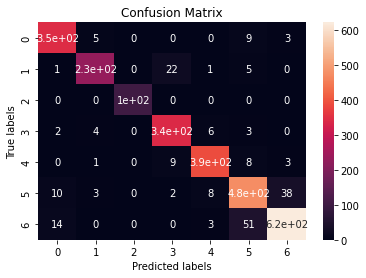

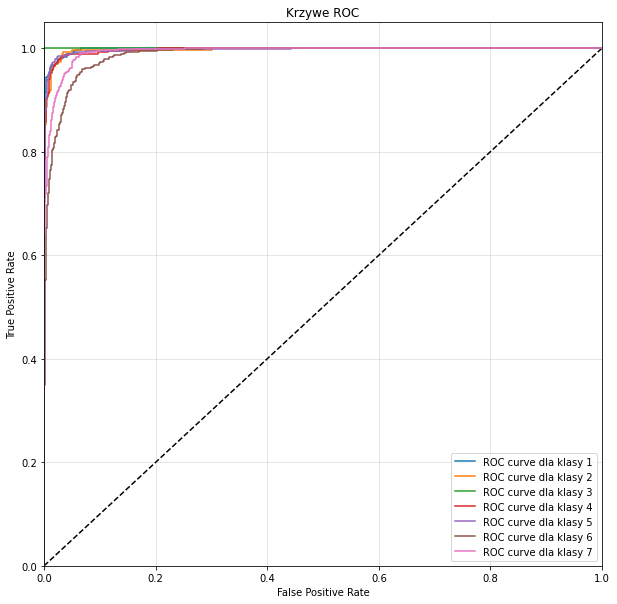

In [ ]:
predict_results = model7.predict(znormalizowany_test)

predict_results= predict_results.argmax(axis = 1)
accuracy_score(predict_results, test_label2)
print(classification_report(predict_results, test_label2))

ax= plt.subplot()
cm = confusion_matrix(test_label2, predict_results)
sns.heatmap(cm, annot=True, ax = ax); 
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
plot_multiclass_roc(model7, znormalizowany_test, test_label2, len(zbior2.Class.unique()), figsize=(10, 10))

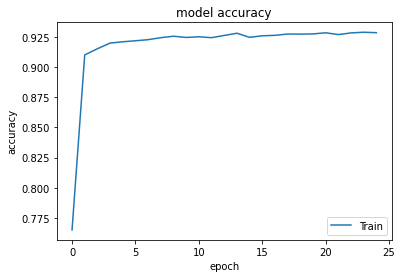

In [ ]:
plt.plot(history7.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train'], loc='lower right')
plt.show()

## 8 sieć

In [ ]:
#### ósma SIEC ####
def budowa8():
    model = Sequential()
    model.add(Dense(120, activation="exponential", input_shape = (znormalizowany_trening.shape[1],))) 
    model.add(Dense(80, activation="sigmoid"))
    model.add(Dense(7, activation='softmax'))                          
    learning_rate = 0.01
    optimizer = optimizers.SGD(learning_rate)
    model.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy']) 
    return model
EPOKA = 25
batch_size = 24
model8 = budowa8()
model8.summary()


history8 = model8.fit(
        znormalizowany_trening, 
        trenowanie1,
        batch_size = batch_size,
        epochs=EPOKA, 
        verbose=1,
        shuffle=True  
    )

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 120)               2040      
_________________________________________________________________
dense_34 (Dense)             (None, 80)                9680      
_________________________________________________________________
dense_35 (Dense)             (None, 7)                 567       
Total params: 12,287
Trainable params: 12,287
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
454/454 [==============================] - 2s 2ms/step - loss: 1.0738 - accuracy: 0.6894
Epoch 2/25
454/454 [==============================] - 1s 2ms/step - loss: 0.4717 - accuracy: 0.8850
Epoch 3/25
454/454 [==============================] - 1s 2ms/step - loss: 0.3265 - accuracy: 0.9055
Epoch 4/25
454/454 [==============================] - 1s 2ms/step - loss: 0.2789

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       372
           1       0.88      0.95      0.91       241
           2       1.00      0.99      1.00       104
           3       0.96      0.92      0.94       371
           4       0.95      0.96      0.95       408
           5       0.90      0.86      0.88       561
           6       0.90      0.93      0.92       666

    accuracy                           0.92      2723
   macro avg       0.93      0.93      0.93      2723
weighted avg       0.92      0.92      0.92      2723



/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

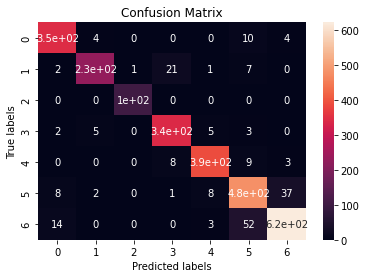

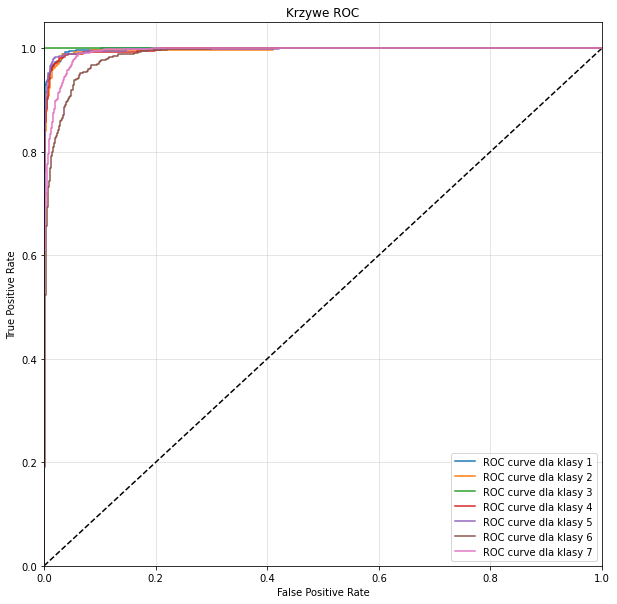

In [ ]:
predict_results = model8.predict(znormalizowany_test)

predict_results= predict_results.argmax(axis = 1)
accuracy_score(predict_results, test_label2)
print(classification_report(predict_results, test_label2))

ax= plt.subplot()
cm = confusion_matrix(test_label2, predict_results)
sns.heatmap(cm, annot=True, ax = ax); 
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
plot_multiclass_roc(model8, znormalizowany_test, test_label2, len(zbior2.Class.unique()), figsize=(10, 10))

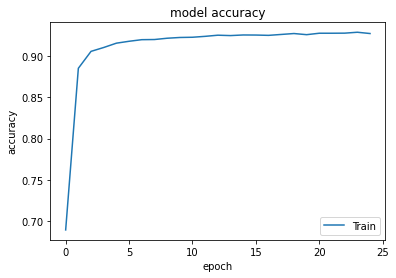

In [ ]:
plt.plot(history8.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train'], loc='lower right')
plt.show()

## 9 sieć

In [ ]:
#### dziewiąta SIEC ####
def budowa9():
    model = Sequential()
    model.add(Dense(150, activation="exponential", input_shape = (znormalizowany_trening.shape[1],))) 
    model.add(Dense(90, activation="relu"))
    model.add(Dense(7, activation='softmax'))                          
    learning_rate = 0.01
    optimizer = optimizers.SGD(learning_rate)
    model.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy']) 
    return model
EPOKA = 25
batch_size = 24
model9 = budowa9()
model9.summary()

with tf.device('/CPU:0'): 

    history9 = model9.fit(
        znormalizowany_trening, 
        trenowanie1,
        batch_size = batch_size,
        epochs=EPOKA, 
        verbose=1,
        shuffle=True  
    )

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 150)               2550      
_________________________________________________________________
dense_37 (Dense)             (None, 90)                13590     
_________________________________________________________________
dense_38 (Dense)             (None, 7)                 637       
Total params: 16,777
Trainable params: 16,777
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
454/454 [==============================] - 2s 2ms/step - loss: 0.4768 - accuracy: 0.8688
Epoch 2/25
454/454 [==============================] - 1s 2ms/step - loss: 0.2432 - accuracy: 0.9157
Epoch 3/25
454/454 [==============================] - 1s 2ms/step - loss: 0.2296 - accuracy: 0.9182
Epoch 4/25
454/454 [==============================] - 1s 2ms/step - loss: 0.217

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       358
           1       0.92      0.91      0.91       263
           2       1.00      1.00      1.00       103
           3       0.93      0.94      0.93       354
           4       0.94      0.97      0.95       401
           5       0.91      0.85      0.87       575
           6       0.91      0.94      0.92       669

    accuracy                           0.92      2723
   macro avg       0.94      0.94      0.94      2723
weighted avg       0.92      0.92      0.92      2723



/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

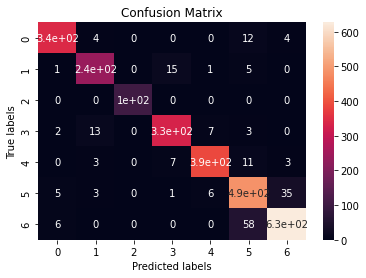

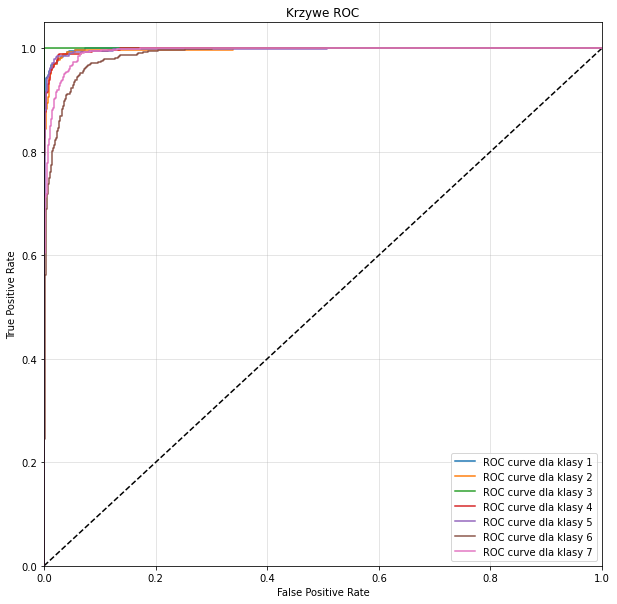

In [ ]:
predict_results = model9.predict(znormalizowany_test)

predict_results= predict_results.argmax(axis = 1)
accuracy_score(predict_results, test_label2)
print(classification_report(predict_results, test_label2))

ax= plt.subplot()
cm = confusion_matrix(test_label2, predict_results)
sns.heatmap(cm, annot=True, ax = ax); 
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
plot_multiclass_roc(model9, znormalizowany_test, test_label2, len(zbior2.Class.unique()), figsize=(10, 10))

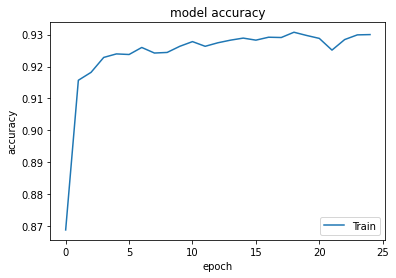

In [ ]:
plt.plot(history9.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train'], loc='lower right')
plt.show()

## 10 sieć

In [ ]:
#### dziesiata SIEC ####
def budowa10():
    model = Sequential()
    model.add(Dense(120, activation="tanh", input_shape = (znormalizowany_trening.shape[1],))) 
    model.add(Dense(80, activation="exponential"))
    model.add(Dense(200, activation="tanh"))
    model.add(Dense(7, activation='softmax'))                          
    learning_rate = 0.01
    optimizer = optimizers.SGD(learning_rate)
    model.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy']) 
    return model
EPOKA = 25
batch_size = 24
model10 = budowa10()
model10.summary()

with tf.device('/CPU:0'): 

    history10 = model10.fit(
        znormalizowany_trening, 
        trenowanie1,
        batch_size = batch_size,
        epochs=EPOKA, 
        verbose=1,
        shuffle=True 
    )

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 120)               2040      
_________________________________________________________________
dense_40 (Dense)             (None, 80)                9680      
_________________________________________________________________
dense_41 (Dense)             (None, 200)               16200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 7)                 1407      
Total params: 29,327
Trainable params: 29,327
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
454/454 [==============================] - 2s 3ms/step - loss: 0.5699 - accuracy: 0.7935
Epoch 2/25
454/

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       371
           1       0.95      0.90      0.92       277
           2       0.99      1.00      1.00       102
           3       0.91      0.96      0.93       335
           4       0.95      0.96      0.95       404
           5       0.90      0.86      0.88       561
           6       0.91      0.94      0.93       673

    accuracy                           0.93      2723
   macro avg       0.94      0.94      0.94      2723
weighted avg       0.93      0.93      0.93      2723



/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

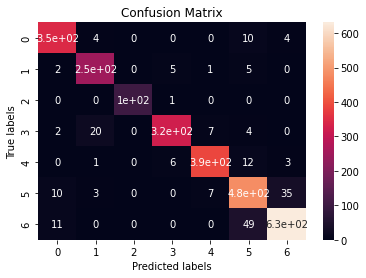

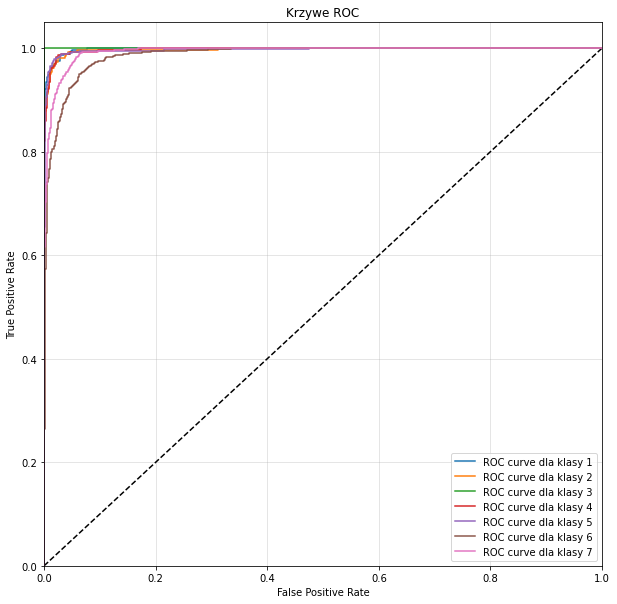

In [ ]:
predict_results = model10.predict(znormalizowany_test)

predict_results= predict_results.argmax(axis = 1)
accuracy_score(predict_results, test_label2)
print(classification_report(predict_results, test_label2))

ax= plt.subplot()
cm = confusion_matrix(test_label2, predict_results)
sns.heatmap(cm, annot=True, ax = ax); 
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
plot_multiclass_roc(model10, znormalizowany_test, test_label2, len(zbior2.Class.unique()), figsize=(10, 10))

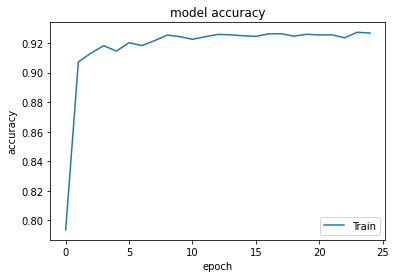

In [ ]:
plt.plot(history10.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train'], loc='lower right')
plt.show()

##11 sieć

In [ ]:
#### jedenasta SIEC ####
def budowa11():
    model = Sequential()
    model.add(Dense(120, activation="tanh", input_shape = (znormalizowany_trening.shape[1],))) 
    model.add(Dense(30, activation="exponential"))
    model.add(Dense(30, activation="tanh"))
    model.add(Dense(30, activation="elu")) 
    model.add(Dense(30, activation="relu"))  
    model.add(Dense(7, activation='softmax'))                          
    learning_rate = 0.01
    optimizer = optimizers.SGD(learning_rate)
    model.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy']) 
    return model
EPOKA = 25
batch_size = 24
model11 = budowa11()
model11.summary()

with tf.device('/CPU:0'): 

    history11 = model11.fit(
        znormalizowany_trening, 
        trenowanie1,
        batch_size = batch_size,
        epochs=EPOKA, 
        verbose=1,
        shuffle=True
    )

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 120)               2040      
_________________________________________________________________
dense_44 (Dense)             (None, 30)                3630      
_________________________________________________________________
dense_45 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_46 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_47 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_48 (Dense)             (None, 7)                 217       
Total params: 8,677
Trainable params: 8,677
Non-trainable params: 0
___________________________________________________

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       364
           1       0.90      0.95      0.92       249
           2       1.00      1.00      1.00       103
           3       0.94      0.93      0.94       359
           4       0.95      0.95      0.95       414
           5       0.84      0.90      0.87       498
           6       0.95      0.90      0.92       736

    accuracy                           0.93      2723
   macro avg       0.93      0.94      0.94      2723
weighted avg       0.93      0.93      0.93      2723



/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

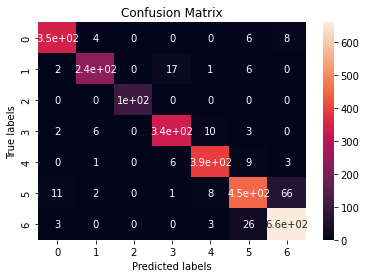

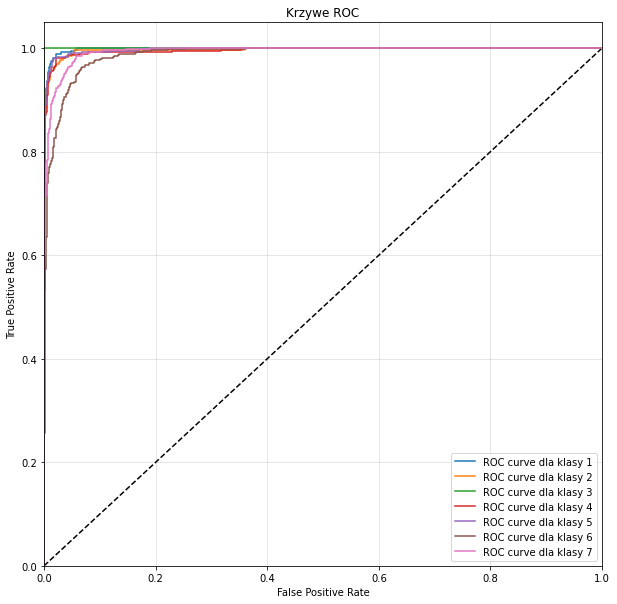

In [ ]:
predict_results = model11.predict(znormalizowany_test)

predict_results= predict_results.argmax(axis = 1)
accuracy_score(predict_results, test_label2)
print(classification_report(predict_results, test_label2))

ax= plt.subplot()
cm = confusion_matrix(test_label2, predict_results)
sns.heatmap(cm, annot=True, ax = ax); 
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
plot_multiclass_roc(model11, znormalizowany_test, test_label2, len(zbior2.Class.unique()), figsize=(10, 10))

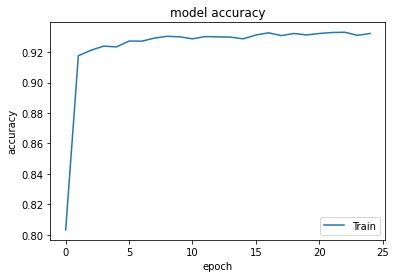

In [ ]:
plt.plot(history11.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train'], loc='lower right')
plt.show()

## 12 sieć

In [ ]:
#### dwunasta SIEC ####
def budowa12():
    model = Sequential()
    model.add(Dense(120, activation="tanh", input_shape = (znormalizowany_trening.shape[1],))) 
    model.add(Dense(30, activation="exponential"))
    model.add(Dense(130, activation="relu"))  
    model.add(Dense(7, activation='softmax'))                          
    learning_rate = 0.01
    optimizer = optimizers.SGD(learning_rate)
    model.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy']) 
    return model
EPOKA = 25
batch_size = 24
model12 = budowa12()
model12.summary()

with tf.device('/CPU:0'): 

    history12 = model12.fit(
        znormalizowany_trening, 
        trenowanie1,
        batch_size = batch_size,
        epochs=EPOKA, 
        verbose=1,
        shuffle=True
    )

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 120)               2040      
_________________________________________________________________
dense_50 (Dense)             (None, 30)                3630      
_________________________________________________________________
dense_51 (Dense)             (None, 130)               4030      
_________________________________________________________________
dense_52 (Dense)             (None, 7)                 917       
Total params: 10,617
Trainable params: 10,617
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
454/454 [==============================] - 1s 2ms/step - loss: 0.4499 - accuracy: 0.8582
Epoch 2/25
454/454 [==============================] - 1s 1ms/step - loss: 0.2419 - accuracy: 0.9155
Epoch 3/25
454/454 [===========================

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       357
           1       0.90      0.93      0.92       256
           2       1.00      1.00      1.00       103
           3       0.94      0.93      0.93       359
           4       0.94      0.96      0.95       406
           5       0.89      0.87      0.88       546
           6       0.93      0.93      0.93       696

    accuracy                           0.93      2723
   macro avg       0.93      0.94      0.94      2723
weighted avg       0.93      0.93      0.93      2723



/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

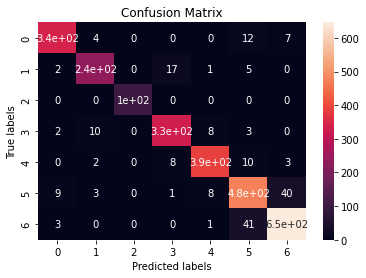

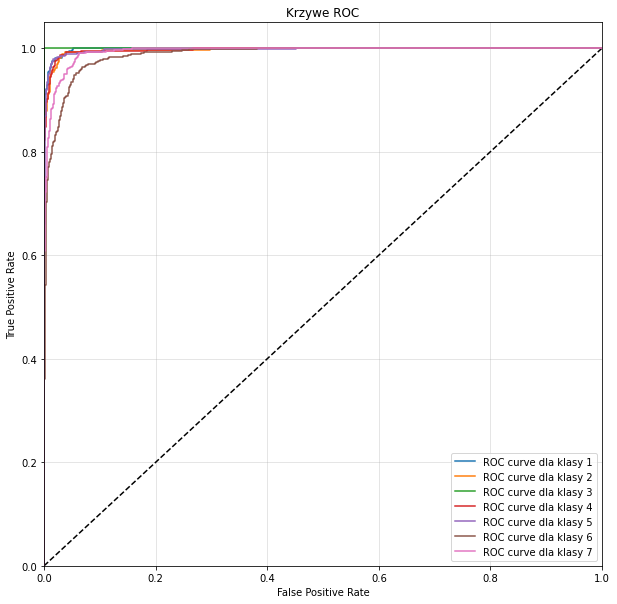

In [ ]:
predict_results = model12.predict(znormalizowany_test)

predict_results= predict_results.argmax(axis = 1)
accuracy_score(predict_results, test_label2)
print(classification_report(predict_results, test_label2))

ax= plt.subplot()
cm = confusion_matrix(test_label2, predict_results)
sns.heatmap(cm, annot=True, ax = ax); 
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
plot_multiclass_roc(model12, znormalizowany_test, test_label2, len(zbior2.Class.unique()), figsize=(10, 10))

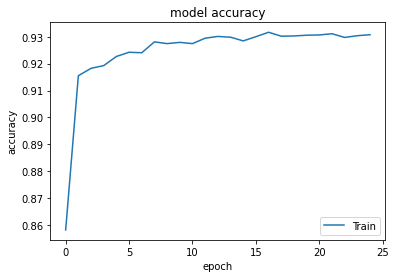

In [ ]:
plt.plot(history12.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train'], loc='lower right')
plt.show()

## 13 sieć

In [ ]:
#### trzynasta SIEC ####
def budowa13():
    model = Sequential()
    model.add(Dense(120, activation="softsign", input_shape = (znormalizowany_trening.shape[1],))) 
    model.add(Dense(80, activation="softsign"))
    model.add(Dense(150, activation="softsign"))
    model.add(Dense(7, activation='softmax'))                          
    learning_rate = 0.01
    optimizer = optimizers.SGD(learning_rate)
    model.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy']) 
    return model
EPOKA = 25
batch_size = 24
model13 = budowa13()
model13.summary()

with tf.device('/CPU:0'): 

    history13 = model13.fit(
        znormalizowany_trening, 
        trenowanie1,
        batch_size = batch_size,
        epochs=EPOKA, 
        verbose=1,
        shuffle=True
    )

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_53 (Dense)             (None, 120)               2040      
_________________________________________________________________
dense_54 (Dense)             (None, 80)                9680      
_________________________________________________________________
dense_55 (Dense)             (None, 150)               12150     
_________________________________________________________________
dense_56 (Dense)             (None, 7)                 1057      
Total params: 24,927
Trainable params: 24,927
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
454/454 [==============================] - 3s 4ms/step - loss: 0.9875 - accuracy: 0.7438
Epoch 2/25
454/454 [==============================] - 1s 2ms/step - loss: 0.5058 - accuracy: 0.8704
Epoch 3/25
454/454 [===========================

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       365
           1       0.91      0.93      0.92       258
           2       0.99      1.00      1.00       102
           3       0.94      0.93      0.93       361
           4       0.95      0.95      0.95       409
           5       0.90      0.86      0.88       561
           6       0.91      0.94      0.92       667

    accuracy                           0.92      2723
   macro avg       0.93      0.93      0.93      2723
weighted avg       0.92      0.92      0.92      2723



/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

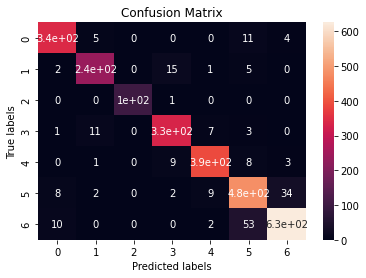

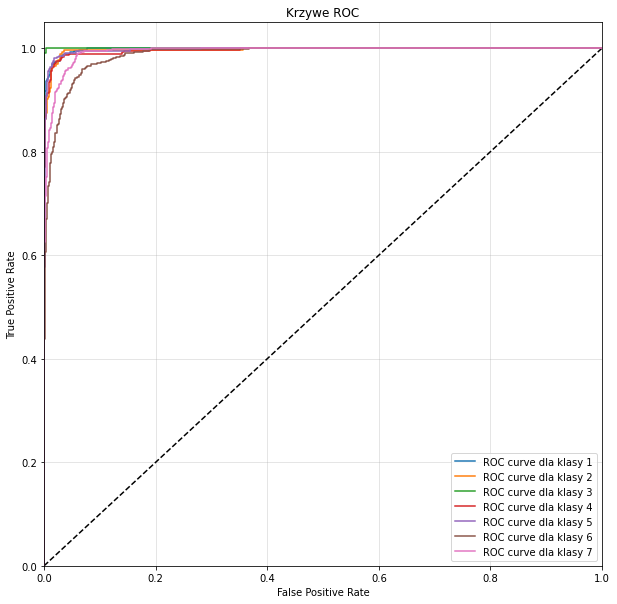

In [ ]:
predict_results = model13.predict(znormalizowany_test)

predict_results= predict_results.argmax(axis = 1)
accuracy_score(predict_results, test_label2)
print(classification_report(predict_results, test_label2))

ax= plt.subplot()
cm = confusion_matrix(test_label2, predict_results)
sns.heatmap(cm, annot=True, ax = ax); 
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
plot_multiclass_roc(model13, znormalizowany_test, test_label2, len(zbior2.Class.unique()), figsize=(10, 10))

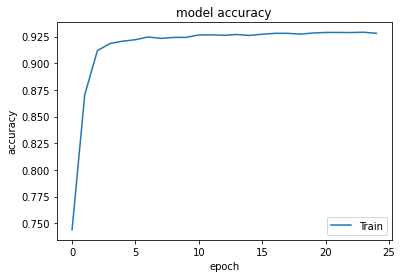

In [ ]:
plt.plot(history13.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train'], loc='lower right')
plt.show()

## 14 sieć

In [ ]:
#### czternasta SIEC ####
def budowa14():
    model = Sequential()
    model.add(Dense(120, activation="softsign", input_shape = (znormalizowany_trening.shape[1],))) 
    model.add(Dense(150, activation="elu"))
    model.add(Dense(7, activation='softmax'))                          
    learning_rate = 0.01
    optimizer = optimizers.SGD(learning_rate)
    model.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy']) 
    return model
EPOKA = 25
batch_size = 24
model14 = budowa14()
model14.summary()

with tf.device('/CPU:0'): 

    history14 = model14.fit(
        znormalizowany_trening, 
        trenowanie1,
        batch_size = batch_size,
        epochs=EPOKA, 
        verbose=1,
        shuffle=True
    )

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_57 (Dense)             (None, 120)               2040      
_________________________________________________________________
dense_58 (Dense)             (None, 150)               18150     
_________________________________________________________________
dense_59 (Dense)             (None, 7)                 1057      
Total params: 21,247
Trainable params: 21,247
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
454/454 [==============================] - 2s 2ms/step - loss: 0.7715 - accuracy: 0.7766
Epoch 2/25
454/454 [==============================] - 1s 2ms/step - loss: 0.3825 - accuracy: 0.9017
Epoch 3/25
454/454 [==============================] - 1s 1ms/step - loss: 0.2954 - accuracy: 0.9133
Epoch 4/25
454/454 [==============================] - 1s 1ms/step - loss: 0.260

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       371
           1       0.90      0.94      0.92       251
           2       0.99      1.00      1.00       102
           3       0.94      0.92      0.93       365
           4       0.95      0.95      0.95       408
           5       0.89      0.85      0.87       561
           6       0.90      0.94      0.92       665

    accuracy                           0.92      2723
   macro avg       0.93      0.93      0.93      2723
weighted avg       0.92      0.92      0.92      2723



/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

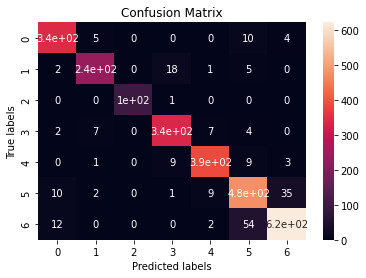

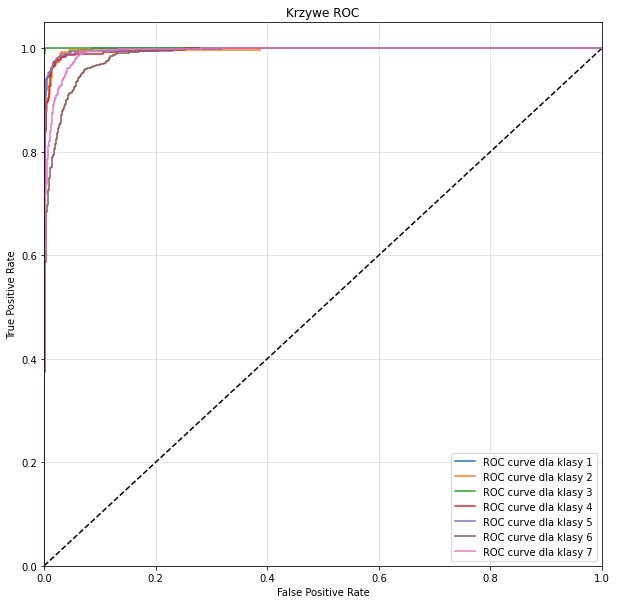

In [ ]:
predict_results = model14.predict(znormalizowany_test)

predict_results= predict_results.argmax(axis = 1)
accuracy_score(predict_results, test_label2)
print(classification_report(predict_results, test_label2))

ax= plt.subplot()
cm = confusion_matrix(test_label2, predict_results)
sns.heatmap(cm, annot=True, ax = ax); 
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
plot_multiclass_roc(model14, znormalizowany_test, test_label2, len(zbior2.Class.unique()), figsize=(10, 10))

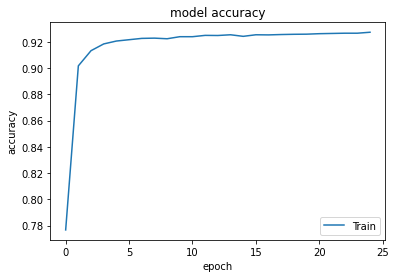

In [ ]:
plt.plot(history14.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train'], loc='lower right')
plt.show()

##15 sieć

In [ ]:
#### pietnasta SIEC ####
def budowa15():
    model = Sequential()
    model.add(Dense(120, activation="sigmoid", input_shape = (znormalizowany_trening.shape[1],))) 
    model.add(Dense(300, activation="sigmoid"))
    model.add(Dense(7, activation='softmax'))                          
    learning_rate = 0.01
    optimizer = optimizers.SGD(learning_rate)
    model.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy']) 
    return model
EPOKA = 25
batch_size = 24
model15 = budowa15()
model15.summary()

with tf.device('/CPU:0'): 

    history15 = model15.fit(
        znormalizowany_trening, 
        trenowanie1,
        batch_size = batch_size,
        epochs=EPOKA, 
        verbose=1,
        shuffle=True
    )

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 120)               2040      
_________________________________________________________________
dense_61 (Dense)             (None, 300)               36300     
_________________________________________________________________
dense_62 (Dense)             (None, 7)                 2107      
Total params: 40,447
Trainable params: 40,447
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
454/454 [==============================] - 2s 3ms/step - loss: 1.7614 - accuracy: 0.2715
Epoch 2/25
454/454 [==============================] - 1s 3ms/step - loss: 1.5729 - accuracy: 0.3564
Epoch 3/25
454/454 [==============================] - 1s 3ms/step - loss: 1.3286 - accuracy: 0.5029
Epoch 4/25
454/454 [==============================] - 1s 3ms/step - loss: 1.099

              precision    recall  f1-score   support

           0       0.96      0.93      0.95       374
           1       0.82      0.91      0.86       234
           2       1.00      0.99      1.00       104
           3       0.92      0.89      0.90       370
           4       0.95      0.95      0.95       412
           5       0.89      0.84      0.86       570
           6       0.89      0.93      0.91       659

    accuracy                           0.91      2723
   macro avg       0.92      0.92      0.92      2723
weighted avg       0.91      0.91      0.91      2723



/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

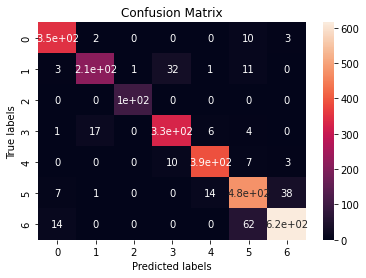

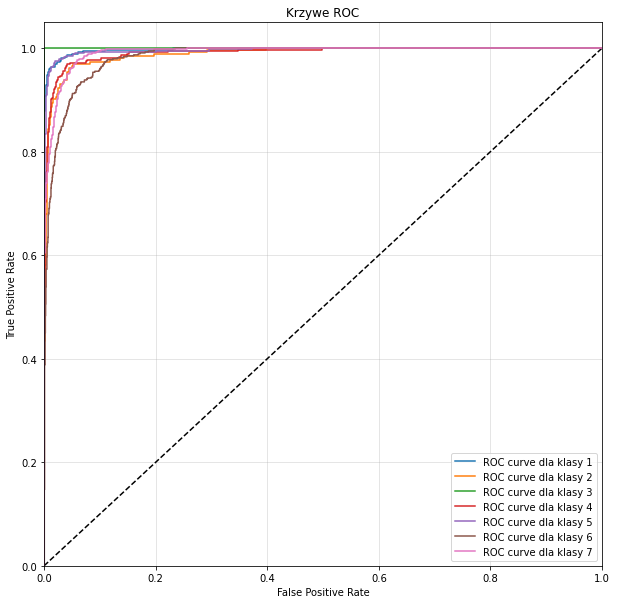

In [ ]:
predict_results = model15.predict(znormalizowany_test)

predict_results= predict_results.argmax(axis = 1)
accuracy_score(predict_results, test_label2)
print(classification_report(predict_results, test_label2))

ax= plt.subplot()
cm = confusion_matrix(test_label2, predict_results)
sns.heatmap(cm, annot=True, ax = ax); 
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
plot_multiclass_roc(model15, znormalizowany_test, test_label2, len(zbior2.Class.unique()), figsize=(10, 10))

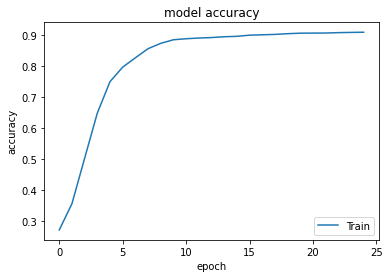

In [ ]:
plt.plot(history15.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train'], loc='lower right')
plt.show()

#Najlepsza sieć na 5 epokach

In [ ]:
#### dziesiata SIEC ####
def budowa16():
    model = Sequential()
    model.add(Dense(120, activation="tanh", input_shape = (znormalizowany_trening.shape[1],))) 
    model.add(Dense(80, activation="exponential"))
    model.add(Dense(200, activation="tanh"))
    model.add(Dropout(0.6))  
    model.add(Dense(7, activation='softmax'))                          
    learning_rate = 0.01
    optimizer = optimizers.SGD(learning_rate)
    model.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy']) 
    return model
EPOKA = 5
batch_size = 24
model16 = budowa16()
model16.summary()

with tf.device('/CPU:0'): 

    history16 = model16.fit(
        znormalizowany_trening, 
        trenowanie1,
        batch_size = batch_size,
        epochs=EPOKA, 
        verbose=1,
        shuffle=True 
    )

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 120)               2040      
_________________________________________________________________
dense_5 (Dense)              (None, 80)                9680      
_________________________________________________________________
dense_6 (Dense)              (None, 200)               16200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 7)                 1407      
Total params: 29,327
Trainable params: 29,327
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
454/454 [==============================] - 2s 3ms/step - loss: 0.5467 - accuracy: 0.8039
Epoch 2/5
454/454

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       393
           1       0.92      0.89      0.91       263
           2       1.00      0.99      0.99        96
           3       0.92      0.94      0.93       308
           4       0.94      0.98      0.96       418
           5       0.88      0.84      0.86       529
           6       0.92      0.92      0.92       716

    accuracy                           0.92      2723
   macro avg       0.93      0.93      0.93      2723
weighted avg       0.92      0.92      0.92      2723



/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

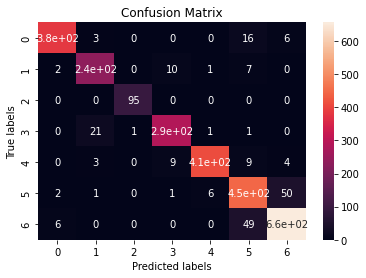

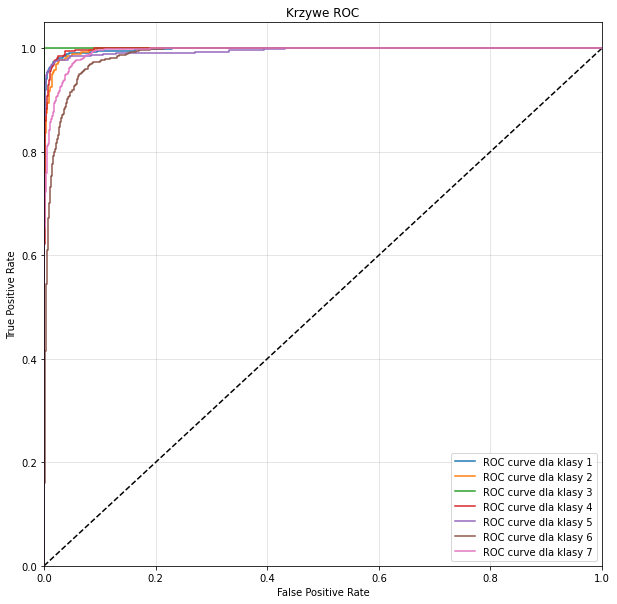

In [ ]:
predict_results = model16.predict(znormalizowany_test)

predict_results= predict_results.argmax(axis = 1)
accuracy_score(predict_results, test_label2)
print(classification_report(predict_results, test_label2))

ax= plt.subplot()
cm = confusion_matrix(test_label2, predict_results)
sns.heatmap(cm, annot=True, ax = ax); 
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
plot_multiclass_roc(model16, znormalizowany_test, test_label2, len(zbior2.Class.unique()), figsize=(10, 10))

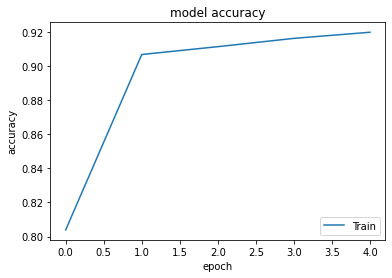

In [ ]:
plt.plot(history16.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train'], loc='lower right')
plt.show()

#Najlepsza na 50 epokach

In [ ]:
#### dziesiata SIEC ####
def budowa17():
    model = Sequential()
    model.add(Dense(120, activation="tanh", input_shape = (znormalizowany_trening.shape[1],))) 
    model.add(Dense(80, activation="exponential"))
    model.add(Dense(200, activation="tanh"))
    model.add(Dense(7, activation='softmax'))                          
    learning_rate = 0.01
    optimizer = optimizers.SGD(learning_rate)
    model.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy']) 
    return model
EPOKA = 50
batch_size = 24
model17 = budowa17()
model17.summary()

with tf.device('/CPU:0'): 

    history17 = model17.fit(
        znormalizowany_trening, 
        trenowanie1,
        batch_size = batch_size,
        epochs=EPOKA, 
        verbose=1,
        shuffle=True 
    )

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 120)               2040      
_________________________________________________________________
dense_9 (Dense)              (None, 80)                9680      
_________________________________________________________________
dense_10 (Dense)             (None, 200)               16200     
_________________________________________________________________
dense_11 (Dense)             (None, 7)                 1407      
Total params: 29,327
Trainable params: 29,327
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
454/454 [==============================] - 2s 3ms/step - loss: 0.4127 - accuracy: 0.8813
Epoch 2/50
454/454 [==============================] - 1s 3ms/step - loss: 0.2288 - accuracy: 0.9189
Epoch 3/50
454/454 [============================

0.9338964377524789
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       407
           1       0.93      0.91      0.92       258
           2       1.00      0.99      0.99        96
           3       0.95      0.93      0.94       317
           4       0.95      0.98      0.96       421
           5       0.86      0.90      0.88       481
           6       0.95      0.91      0.93       743

    accuracy                           0.93      2723
   macro avg       0.94      0.94      0.94      2723
weighted avg       0.93      0.93      0.93      2723



/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

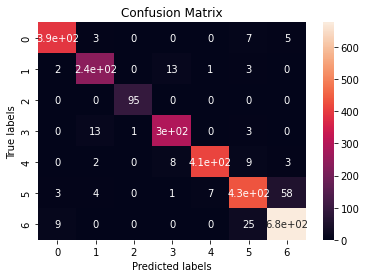

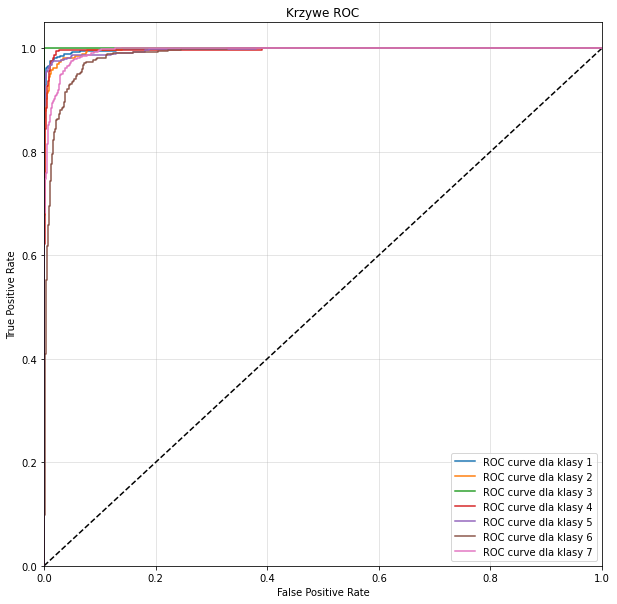

In [ ]:
predict_results = model17.predict(znormalizowany_test)

predict_results= predict_results.argmax(axis = 1)
print(accuracy_score(predict_results, test_label2))
print(classification_report(predict_results, test_label2))

ax= plt.subplot()
cm = confusion_matrix(test_label2, predict_results)
sns.heatmap(cm, annot=True, ax = ax); 
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
plot_multiclass_roc(model17, znormalizowany_test, test_label2, len(zbior2.Class.unique()), figsize=(10, 10))

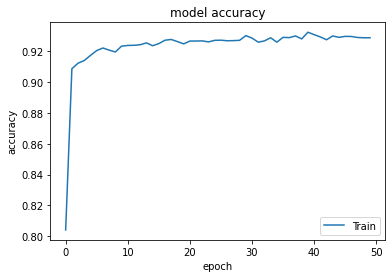

In [ ]:
plt.plot(history17.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train'], loc='lower right')
plt.show()

#Najlepsza na 100 epokach

In [ ]:
#### dziesiata SIEC ####
def budowa18():
    model = Sequential()
    model.add(Dense(120, activation="tanh", input_shape = (znormalizowany_trening.shape[1],))) 
    model.add(Dense(80, activation="exponential"))
    model.add(Dense(200, activation="tanh"))
    model.add(Dense(7, activation='softmax'))                          
    learning_rate = 0.01
    optimizer = optimizers.SGD(learning_rate)
    model.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy']) 
    return model
EPOKA = 100
batch_size = 24
model18 = budowa18()
model18.summary()

with tf.device('/CPU:0'): 

    history18 = model18.fit(
        znormalizowany_trening, 
        trenowanie1,
        batch_size = batch_size,
        epochs=EPOKA, 
        verbose=1,
        shuffle=True 
    )

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 120)               2040      
_________________________________________________________________
dense_13 (Dense)             (None, 80)                9680      
_________________________________________________________________
dense_14 (Dense)             (None, 200)               16200     
_________________________________________________________________
dense_15 (Dense)             (None, 7)                 1407      
Total params: 29,327
Trainable params: 29,327
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
454/454 [==============================] - 3s 4ms/step - loss: 0.4371 - accuracy: 0.8704
Epoch 2/100
454/454 [==============================] - 2s 3ms/step - loss: 0.2269 - accuracy: 0.9203
Epoch 3/100
454/454 [=========================

0.9357326478149101
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       404
           1       0.93      0.93      0.93       255
           2       1.00      0.99      0.99        96
           3       0.96      0.92      0.94       325
           4       0.95      0.98      0.96       419
           5       0.88      0.88      0.88       503
           6       0.94      0.92      0.93       721

    accuracy                           0.94      2723
   macro avg       0.95      0.94      0.94      2723
weighted avg       0.94      0.94      0.94      2723



/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

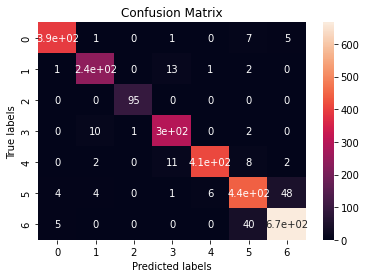

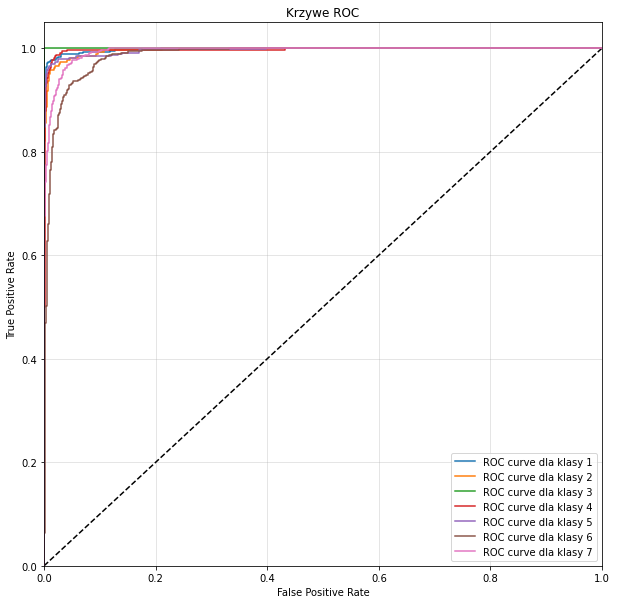

In [ ]:
predict_results = model18.predict(znormalizowany_test)

predict_results= predict_results.argmax(axis = 1)
print(accuracy_score(predict_results, test_label2))
print(classification_report(predict_results, test_label2))

ax= plt.subplot()
cm = confusion_matrix(test_label2, predict_results)
sns.heatmap(cm, annot=True, ax = ax); 
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
plot_multiclass_roc(model18, znormalizowany_test, test_label2, len(zbior2.Class.unique()), figsize=(10, 10))

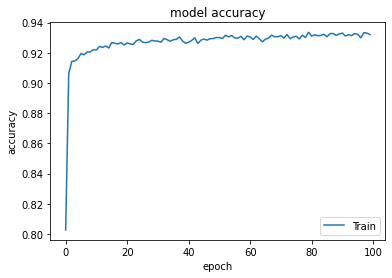

In [ ]:
plt.plot(history18.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train'], loc='lower right')
plt.show()